In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

In [2]:
asd = pd.read_csv("train_final_i_think.csv")
asd_t=pd.read_csv("test_final_i_think.csv")
print("Dataset loaded...")

Dataset loaded...


In [3]:
asd=asd[0:2094]
asd_t=asd_t[0:400]

In [4]:
asd

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,1,0,1,0,1,0,1,0,1,...,f,Unkown,no,no,Austria,no,6,18 and more,Self,0
1,1,0,0,0,0,0,0,0,0,0,...,m,Unkown,no,no,India,no,0,18 and more,Self,0
2,2,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,10,18 and more,Self,1
3,3,0,0,0,0,0,0,0,0,0,...,f,Unkown,no,no,United States,no,0,18 and more,Self,0
4,4,0,0,0,0,0,0,0,0,0,...,m,Unkown,no,no,South Africa,no,0,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,2089,1,1,0,1,0,0,0,1,0,...,m,Latino,yes,yes,Costa Rica,no,5,18 and more,Parent,0
2090,2090,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,United States,no,3,18 and more,Self,0
2091,2091,1,0,0,0,0,0,0,1,0,...,f,Asian,no,no,United Kingdom,no,2,18 and more,Self,0
2092,2092,0,1,0,1,0,0,0,1,0,...,m,White-European,no,yes,United Kingdom,no,3,18 and more,Self,0


In [5]:
asd = asd.sample(frac=1)

In [6]:
asd.head()

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
377,377,1,1,1,1,1,0,1,0,1,...,f,Middle Eastern,no,no,United States,no,8,18 and more,Self,1
1434,1434,0,1,0,0,0,0,0,1,1,...,m,Unkown,no,no,Russia,no,3,18 and more,Unkown,0
132,132,0,1,0,0,0,0,0,0,0,...,m,Middle Eastern,no,no,India,no,2,18 and more,Self,0
357,357,0,0,0,0,0,0,0,0,0,...,m,Unkown,no,no,New Zealand,no,0,18 and more,Self,0
977,977,1,1,1,1,1,1,1,1,1,...,m,White-European,no,no,United Kingdom,no,10,4-11 years,Parent,1


In [7]:
asd.describe()

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class/ASD
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,1046.500000,0.645177,0.494269,0.503820,0.482808,0.506686,0.379656,0.440306,0.577364,0.436008,0.618434,5.084527,0.289398
std,604.630052,0.478574,0.500087,0.500105,0.499824,0.500075,0.485417,0.496542,0.494097,0.496007,0.485887,2.952081,0.453591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,523.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1046.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000
75%,1569.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000
max,2093.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


In [8]:
asd.columns

Index(['Unnamed: 0', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
       'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [11]:
asd.drop(['age_desc', 'used_app_before','Unnamed: 0'], axis = 1, inplace = True)
asd_t.drop(['age_desc', 'used_app_before','Unnamed: 0'], axis = 1, inplace = True)
asd.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [12]:
asd.dtypes

A1_Score          int64
A2_Score          int64
A3_Score          int64
A4_Score          int64
A5_Score          int64
A6_Score          int64
A7_Score          int64
A8_Score          int64
A9_Score          int64
A10_Score         int64
age              object
gender           object
ethnicity        object
jaundice         object
austim           object
contry_of_res    object
result            int64
relation         object
Class/ASD         int64
dtype: object

<Axes: xlabel='Class/ASD', ylabel='count'>

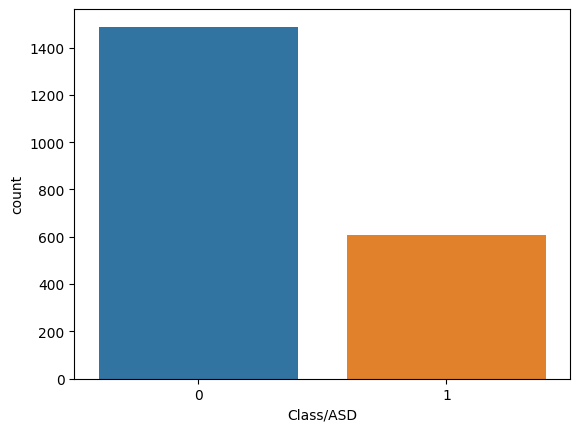

In [13]:
sns.countplot(x='Class/ASD' , data=asd)

<Axes: >

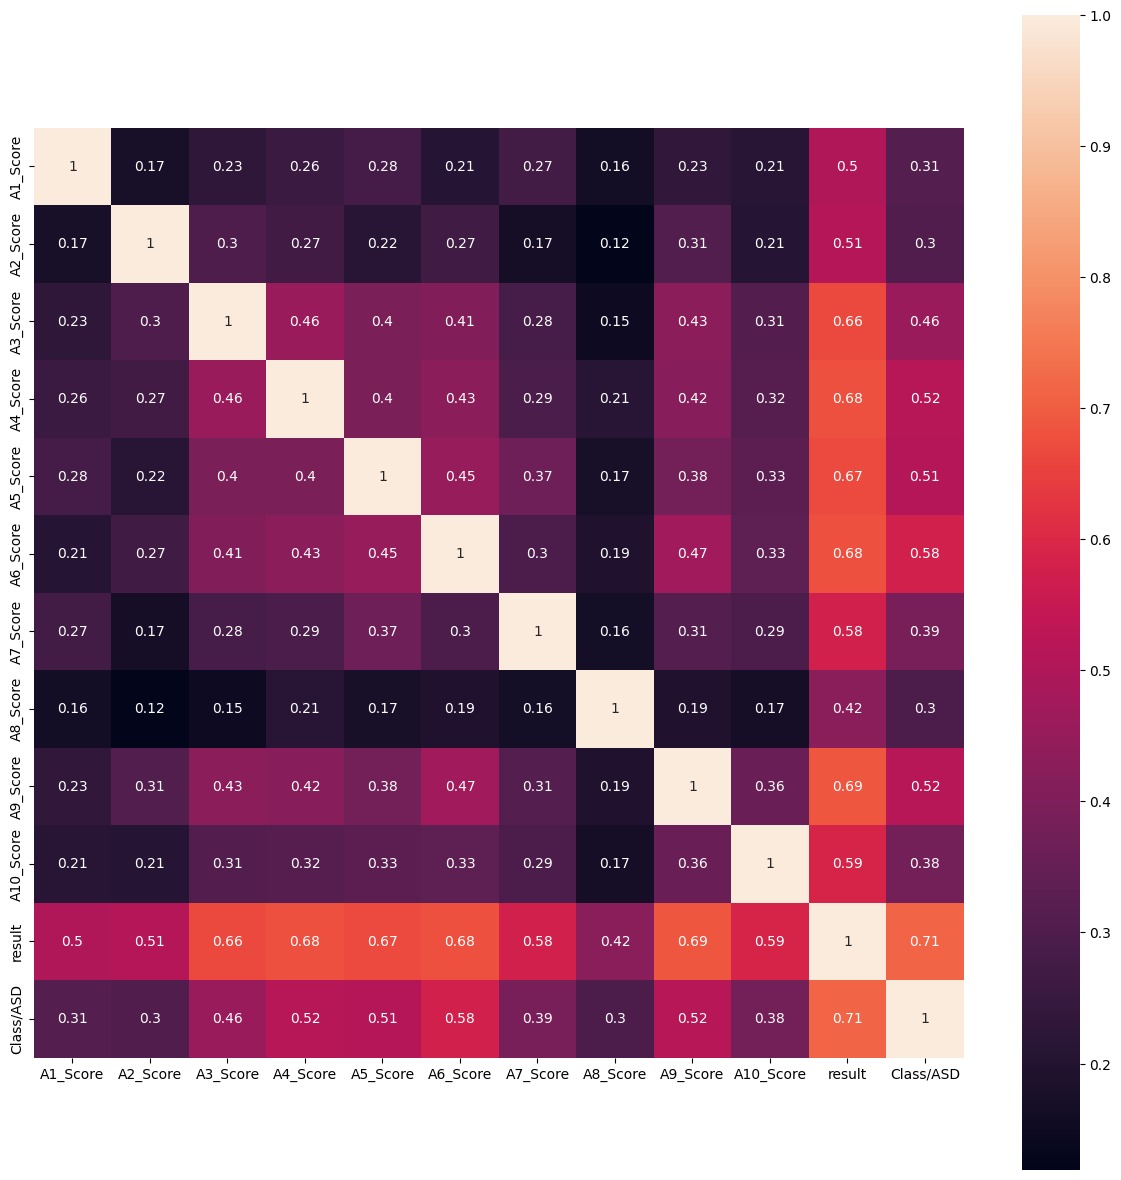

In [14]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Middle Eastern '),
  Text(1, 0, 'Unkown'),
  Text(2, 0, 'White-European'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Latino'),
  Text(5, 0, 'Others'),
  Text(6, 0, 'Black'),
  Text(7, 0, 'Pasifika'),
  Text(8, 0, 'South Asian'),
  Text(9, 0, 'Hispanic'),
  Text(10, 0, 'Turkish'),
  Text(11, 0, 'others')])

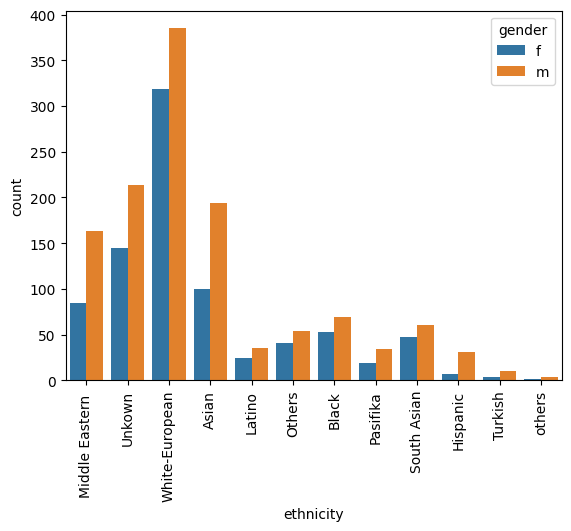

In [15]:
sns.countplot(x='ethnicity',hue='gender',data=asd)
plt.xticks(rotation=90)

<Axes: xlabel='ethnicity', ylabel='count'>

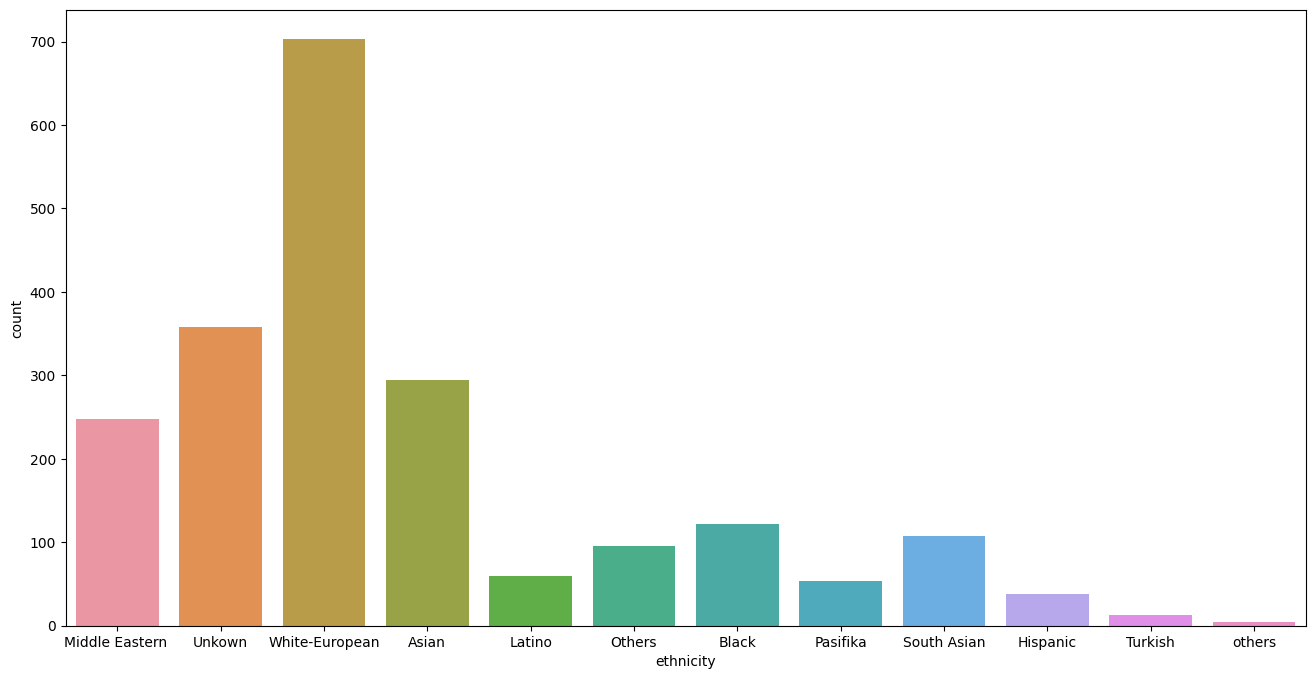

In [16]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'ethnicity', data = asd)

In [17]:
asd.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [18]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 377 to 407
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   A1_Score       2094 non-null   int64 
 1   A2_Score       2094 non-null   int64 
 2   A3_Score       2094 non-null   int64 
 3   A4_Score       2094 non-null   int64 
 4   A5_Score       2094 non-null   int64 
 5   A6_Score       2094 non-null   int64 
 6   A7_Score       2094 non-null   int64 
 7   A8_Score       2094 non-null   int64 
 8   A9_Score       2094 non-null   int64 
 9   A10_Score      2094 non-null   int64 
 10  age            2094 non-null   object
 11  gender         2094 non-null   object
 12  ethnicity      2094 non-null   object
 13  jaundice       2094 non-null   object
 14  austim         2094 non-null   object
 15  contry_of_res  2094 non-null   object
 16  result         2094 non-null   int64 
 17  relation       2094 non-null   object
 18  Class/ASD      2094 non-nul

In [19]:
le = LabelEncoder()
columns = ['ethnicity','contry_of_res', 'relation', 'Class/ASD', 'age', 'jaundice','gender','austim']
columns_t = ['ethnicity','contry_of_res', 'relation', 'age', 'jaundice','gender','austim']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
for col in columns_t:
    asd_t[col] = le.fit_transform(asd_t[col])
asd.dtypes

A1_Score         int64
A2_Score         int64
A3_Score         int64
A4_Score         int64
A5_Score         int64
A6_Score         int64
A7_Score         int64
A8_Score         int64
A9_Score         int64
A10_Score        int64
age              int64
gender           int64
ethnicity        int64
jaundice         int64
austim           int64
contry_of_res    int64
result           int64
relation         int64
Class/ASD        int64
dtype: object

In [20]:
X= asd.drop(['Class/ASD'], axis = 1)
Y= asd['Class/ASD']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)
print('Processed...')

Processed...


In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
preds = logreg.predict(x_test)
logreg.score(x_train, y_train)

0.9050746268656716

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
pred1=logreg.predict(x_train)
accuracy_score(y_train, pred1)

0.9050746268656716

In [23]:
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test != pred))

In [24]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
pred1=knn.predict(x_train)
accuracy_score(y_train, pred1)

0.8286567164179105

In [25]:
confusion_matrix(y_test, pred)

array([[293,  22],
       [ 61,  43]])

In [26]:
NB = GaussianNB()
NB.fit(x_train, y_train)
pred = NB.predict(x_test)
pred1=NB.predict(x_train)
accuracy_score(y_train, pred1)

0.9170149253731343

In [27]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred1=model.predict(x_train)
accuracy_score(y_train, pred1)

0.8871641791044776

In [28]:
confusion_matrix(y_test,pred)


array([[287,  28],
       [ 33,  71]])

In [29]:
models = []
models.append(('Logistic Regression:', LogisticRegression()))
models.append(('Naive Bayes        :', GaussianNB()))
models.append(('SVM                :', SVC()))
models.append(('KNN                :', KNeighborsClassifier()))


for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

Logistic Regression: 0.8926014319809069
Naive Bayes        : 0.8949880668257757
SVM                : 0.8544152744630071
KNN                : 0.8448687350835322


In [30]:
import pickle
model_filename = 'logistic_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(logreg, file)

In [31]:
model_filename = 'knn_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(knn, file)

In [32]:
model_filename = 'SVM_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

In [33]:
model_filename = 'NB_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(logreg, file)

In [34]:
pip install pycaret

In [35]:
x_train

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,relation
1423,0,1,0,0,0,0,0,0,0,0,18,1,10,0,0,86,1,4
1192,1,0,1,0,0,0,0,1,0,1,6,1,0,0,0,40,4,2
1962,1,0,0,1,1,0,0,1,1,0,9,1,10,0,0,8,5,2
1883,1,1,1,0,1,1,1,1,1,1,18,1,10,0,0,86,9,4
399,1,1,1,1,1,1,1,1,1,1,52,1,10,1,0,86,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,0,1,1,0,0,0,0,1,0,0,14,0,9,1,0,0,3,5
1761,0,1,0,0,0,0,0,1,0,0,18,0,8,0,0,81,2,4
1211,1,1,0,1,1,0,0,1,0,1,8,1,4,0,1,59,6,2
1557,0,0,0,0,0,1,0,1,0,0,9,0,9,0,0,83,2,5


In [40]:
from pycaret.classification import *
clf=setup(data=x_train,target=y_train)
best=compare_models()


,Description,Value
0,Session id,7998
1,Target,Class/ASD
2,Target type,Binary
3,Original data shape,"(1675, 19)"
4,Transformed data shape,"(1675, 19)"
5,Transformed train set shape,"(1172, 19)"
6,Transformed test set shape,"(503, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9326,0.9689,0.9458,0.8497,0.8943,0.8451,0.8486,0.3500
lightgbm,Light Gradient Boosting Machine,0.9283,0.9698,0.9230,0.8521,0.8855,0.8335,0.8356,0.4740
ada,Ada Boost Classifier,0.9275,0.9642,0.9458,0.8372,0.8871,0.8341,0.8386,0.2930
rf,Random Forest Classifier,0.9249,0.9671,0.9174,0.8469,0.8800,0.8256,0.8277,0.7480
nb,Naive Bayes,0.9206,0.9548,0.9089,0.8427,0.8734,0.8158,0.8183,0.0640
xgboost,Extreme Gradient Boosting,0.9198,0.9661,0.8946,0.8483,0.8700,0.8121,0.8136,0.2980
lr,Logistic Regression,0.9087,0.9582,0.8605,0.8425,0.8494,0.7840,0.7861,0.6570
et,Extra Trees Classifier,0.9087,0.9545,0.8490,0.8489,0.8479,0.7827,0.7837,0.6890
ridge,Ridge Classifier,0.9002,0.0000,0.8804,0.8097,0.8414,0.7690,0.7726,0.0520
lda,Linear Discriminant Analysis,0.8968,0.9529,0.8918,0.7958,0.8389,0.7636,0.7685,0.0960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [41]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=7998, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
